## In this jupyter notebook
* productivity targets, 
* bright spots and 
* productivity gaps are calculated 
   
**=====================================================================================================================**

![title](img/Fig5.png)

**=====================================================================================================================**

## 1 Import packages/libraries

In [1]:
import os
import glob

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# change the directory to where the modules are saved
os.chdir(os.path.join(os.path.split(os.getcwd())[0], "Modules"))
from GIS_functions import GIS_function as gis

## 2 Import the input data (seasonal ${ET_a}$, biomass and WP raster data)

In [2]:
dir_proj = os.path.split(os.getcwd())[0]   
dir_data = "Data"

input_ETfolder1    = os.path.join(dir_proj, dir_data, "2L2_AETI_season") 
input_ETfhs1       = glob.glob(input_ETfolder1 + '\*.tif')

input_Yieldfolder1 = os.path.join(dir_proj, dir_data, "4L2_Biomass") 
input_Yieldfhs1    = glob.glob(input_Yieldfolder1 + '\*.tif')

input_WPfolder1    = os.path.join(dir_proj, dir_data, "4L2_Biomass_WP") 
input_WPfhs1       = glob.glob(input_WPfolder1 + '\*.tif')

input_ETfhs1 , input_Yieldfhs1, input_WPfhs1

(['E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2009-10-01_to_2010-09-30.tif',
  'E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2010-10-01_to_2011-09-30.tif',
  'E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2011-10-01_to_2012-09-30.tif',
  'E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2012-10-01_to_2013-09-30.tif',
  'E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2013-10-01_to_2014-09-30.tif',
  'E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2014-10-01_to_2015-09-30.tif',
  'E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2015-10-01_to_2016-09-30.tif',
  'E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2016-10-01_to_2017-09-30.tif',
  'E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2017-10-01_to_2018-09-30.tif',
  'E:\\WAPORWP\\Data\\2L2_AETI_season\\AETI_2018-10-01_to_2019-09-30.tif'],
 ['E:\\WAPORWP\\Data\\4L2_Biomass\\BM_2009-10-01_to_2010-09-30.tif',
  'E:\\WAPORWP\\Data\\4L2_Biomass\\BM_2010-10-01_to_2011-09-30.tif',
  'E:\\WAPORWP\\Data\\4L2_Biomass\\BM_2011-10-01_to_2012-09-30.tif',
  'E:\\WAPORWP\\Data\\4L2_Biomass\\BM_2012

# 3 Calculate the target productivity 

## a) Define function to plot productivity targets
#This function plot WP vs Yield(biomass) and histogram of WP

In [3]:
from matplotlib.patches import Rectangle
import matplotlib.lines as mlines
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# helps to sync colorbar  height with the plot

def plotProductivity (AETI1_1D,CropYield1_1D,WP1_1D):  
    # plot
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    ax1.scatter(CropYield1_1D,
                WP1_1D,
                marker='*',color="grey")

    ax1.scatter(np.nanpercentile(CropYield1_1D, 95),
                np.nanpercentile(WP1_1D, 95),
                marker='*', color='black', s=100)

    ax1.axvline(np.nanpercentile(CropYield1_1D, 95),
                color="#EE6666", linestyle="--")
    
    ax1.axhline(np.nanpercentile(WP1_1D, 95),
                color="#EE6666", linestyle="--")    
    
    # ax2 for histogram
    counts, bins, patches = ax2.hist(WP1_1D, bins=100, facecolor='skyblue', edgecolor='none', histtype="bar")

    # add legend 
    fakeLine = plt.Line2D([0,0], [0,1], color="#EE6666", linestyle='--')
    fakemark = mlines.Line2D([], [], color='black', marker='*', markersize=10)
    ax2.legend([fakeLine, fakemark], ["95 percentile", 'Productivity target'])

    # Colours for different percentiles of the histogram
    twentyfifth, ninetyfifth = np.nanpercentile(WP1_1D, [5, 95])
    for patch, leftside, rightside in zip(patches, bins[:-1], bins[1:]):
        if rightside < twentyfifth:
            patch.set_facecolor('#EE6666')
        elif leftside > ninetyfifth:
            patch.set_facecolor('green')

    # create legend
    handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ['#EE6666', 'green']]
    labels = ["0-5 Percentile",">95 Percentile"]
    plt.legend(handles, labels)

    # Title  
    ax1.set_title('Yield vs WP ' + str(year) + '/' + str(int(year) + 1), fontsize=14)
    ax1.set_xlabel('Yield [t/ha]', fontsize=13)
    ax1.set_ylabel('WP [kg/m3]', fontsize=13)

    ax2.set_title('WP ' + str(year) + '/' + str(int(year) + 1), fontsize=14)
    ax2.set_xlabel('WP [kg/m3]', fontsize=13)
    ax2.set_ylabel('Number of pixels', fontsize=13)

    return None 

## b) Calculate the target productivity

        Year  Target_Yield  Target_WP
0  2009/2010          89.0        6.4
1  2010/2011          90.0        6.0
2  2011/2012          97.0        6.8
3  2012/2013         102.0        7.1
4  2013/2014         100.0        6.5
5  2014/2015          93.0        6.0
6  2015/2016          85.0        6.1
7  2016/2017          96.0        6.4
8  2017/2018          98.0        6.4
9  2018/2019          87.0        5.8


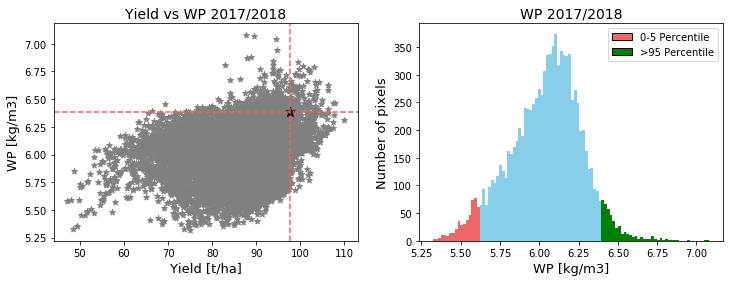

In [5]:
in_fh = input_ETfhs1[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

Year    = []
Yieldt  = []
WPt     = []

year = 2009
for in_fhET, in_fhY, in_fhWP in zip(input_ETfhs1, input_Yieldfhs1, input_WPfhs1): 
    aETI1       = gis.OpenAsArray(in_fhET, nan_values=True) 
    cropYield1  = gis.OpenAsArray(in_fhY,  nan_values=True) 
    wP1         = gis.OpenAsArray(in_fhWP, nan_values=True)
    
    # reshape the arrays
    AETI1_1D      = np.reshape(aETI1, aETI1.shape[0]*aETI1.shape[1])
    CropYield1_1D = np.reshape(cropYield1, cropYield1.shape[0] * cropYield1.shape[1])
    WP1_1D        = np.reshape(wP1, wP1.shape[0] * wP1.shape[1])
    
    # targets productivity
    TargetYield = round(np.nanpercentile(CropYield1_1D, 95), 0)  # Yield at 95 percentile
    TargetWP    = round(np.nanpercentile(WP1_1D, 95), 1)         # WP at 95 percentile
    season = (str(year) + '/' + str(year + 1))
    Year.append(season)
    Yieldt.append(TargetYield )
    WPt.append(TargetWP)
    
    # scatter plot of Yield vs WP and histogram of WP for 2017
    if year == 2017:
        plotProductivity(AETI1_1D, CropYield1_1D, WP1_1D)
        
    year += 1

# save the data into dataframe - tabular form
data_tuples = list(zip(Year, Yieldt, WPt))
df_targets = pd.DataFrame(data_tuples, columns=['Year', 'Target_Yield', 'Target_WP'])
print(df_targets)

# 4 Identify bright spots 

C:\Users\ach006\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in greater_equal
C:\Users\ach006\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in less


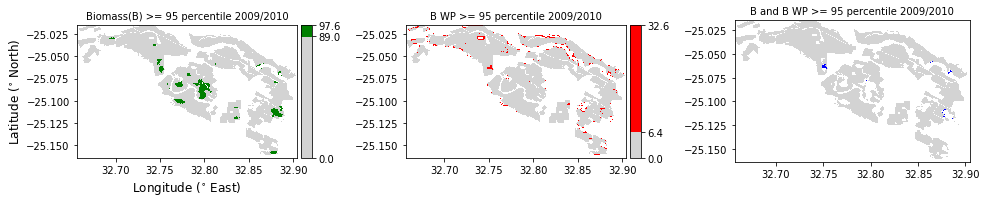

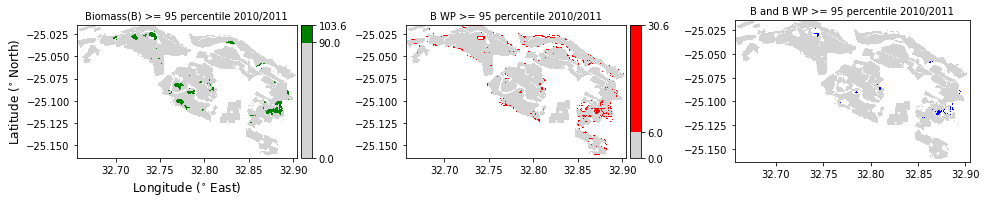

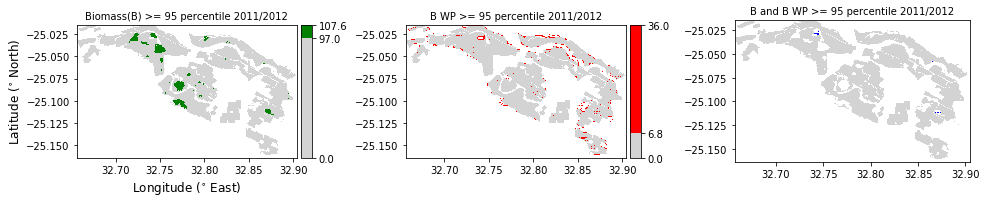

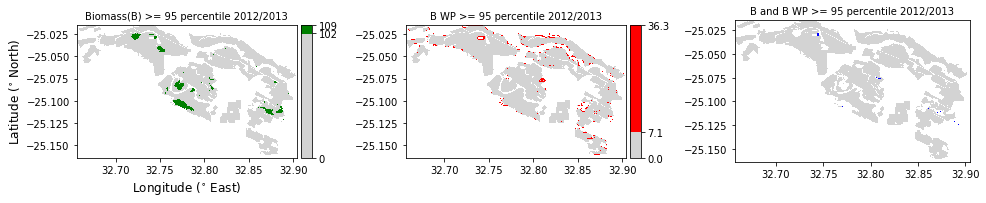

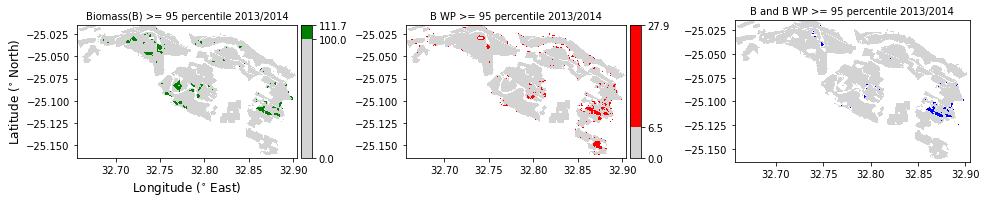

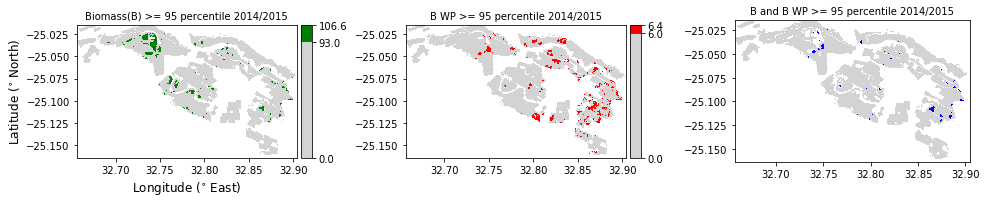

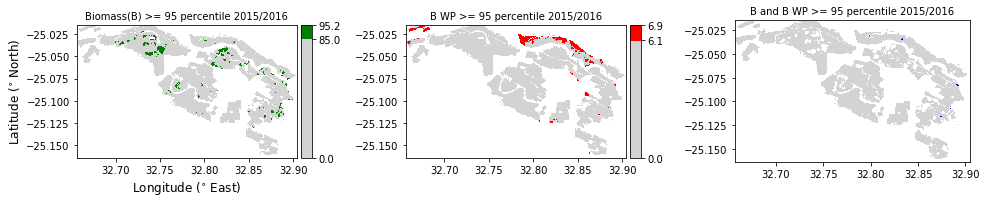

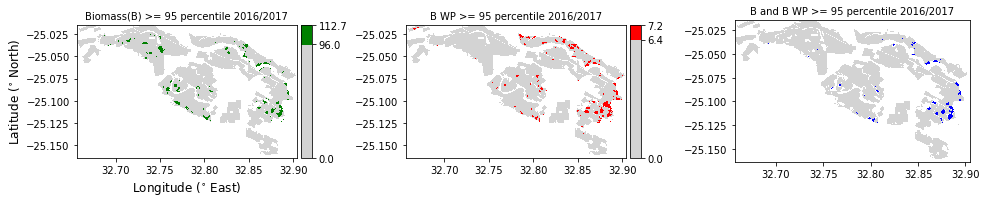

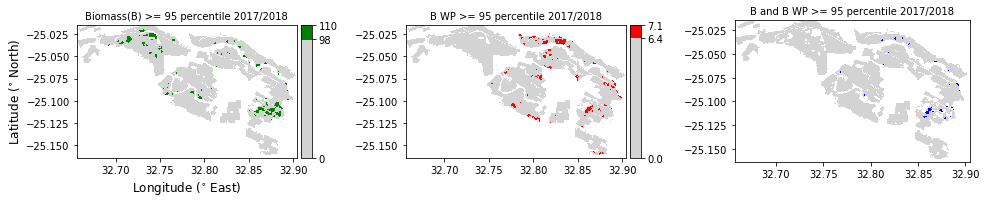

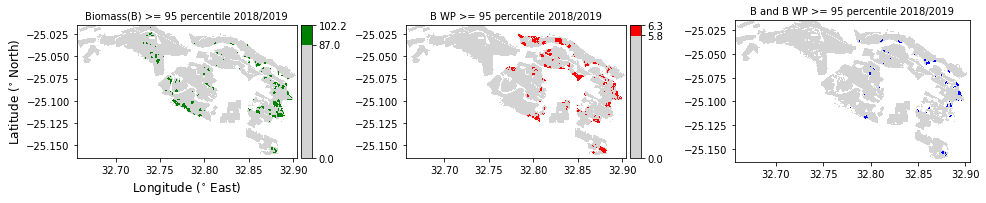

In [6]:
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable  # helps to sync colorbar height with the plot

in_fh = input_ETfhs1[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

year = 2009
for in_fhET, in_fhY, in_fhWP in zip(input_ETfhs1, input_Yieldfhs1, input_WPfhs1): 
    aETI1       = gis.OpenAsArray(in_fhET, nan_values=True) 
    cropYield1  = gis.OpenAsArray(in_fhY,  nan_values=True) 
    wP1         = gis.OpenAsArray(in_fhWP, nan_values=True)
    
    AETI1_1D      = np.reshape(aETI1, aETI1.shape[0] * aETI1.shape[1])
    CropYield1_1D = np.reshape(cropYield1, cropYield1.shape[0] * cropYield1.shape[1])
    WP1_1D        = np.reshape(wP1, wP1.shape[0] * wP1.shape[1])
    
    # save the data into dataframe - tabular form
    data_tuples = list(zip(AETI1_1D,CropYield1_1D,WP1_1D))
    df          = pd.DataFrame(data_tuples, columns=['AETI','Yield','WP'])
    
    # thresholds for the targets
    TargetYield = round(np.nanpercentile(CropYield1_1D, 95), 0)
    TargetWP    = round(np.nanpercentile(WP1_1D, 95), 1)
    maxYield    = round(df["Yield"].max(),1)
    maxWP       = round(df["WP"].max(),1)
        
    ## Plot
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))
    
    # ax1, plot raster map, highlight Yield greater than or equal to the target
    cmap1   = colors.ListedColormap(['lightgrey', 'green'])
    bounds1 = [0, TargetYield, maxYield]
    norm1   = colors.BoundaryNorm(bounds1, cmap1.N)
    
    img1     = ax1.imshow(cropYield1, cmap=cmap1, norm=norm1, extent=spatial_extent)
    divider1 = make_axes_locatable(ax1)
    cax1     = divider1.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img1, spacing='proportional', ax=ax1, cax=cax1)
    ax1.set_title ('Biomass(B) >= 95 percentile ' + str(year) + '/' + str(year + 1), fontsize=10)
    
    ### add axes label
    ax1.set_xlabel('Longitude ($^{\circ}$ East)', fontsize=12)  # add axes label
    ax1.set_ylabel('Latitude ($^{\circ}$ North)', fontsize=12)
    
    # ax2, plot raster map, highlight Yield greater than or equal to the target 
    cmap2   = colors.ListedColormap(['lightgrey', 'red'])
    bounds2 = [0, TargetWP, maxWP]
    norm2   = colors.BoundaryNorm(bounds2, cmap2.N)
 
    img2     = ax2.imshow(wP1, cmap=cmap2, norm=norm2, extent=spatial_extent)
    divider2 = make_axes_locatable(ax2)
    cax2     = divider2.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img2, spacing='proportional', ax=ax2, cax=cax2)
    ax2.set_title ('B WP >= 95 percentile ' + str(year) + '/' + str(year + 1), fontsize=10)  
    
    # ax3, plot raster map, highlight when both Yield and WP greater than or equal to the targets
    yield_targeSpots     = np.where(((cropYield1 >= TargetYield) & (wP1 >= TargetWP)), cropYield1, np.nan)
    yield_WP_targetSpots = np.where((cropYield1 < TargetYield), 1, yield_targeSpots)

    cmap3   = colors.ListedColormap(['lightgrey', 'blue'])
    bounds3 = [0, TargetWP, maxWP]
    norm3   = colors.BoundaryNorm(bounds3, cmap3.N)
 
    img3 = ax3.imshow(yield_WP_targetSpots, cmap=cmap3, norm=norm3, extent=spatial_extent)
    # fig.colorbar(img3, spacing='proportional', ax=ax3)
    ax3.set_title ('B and B WP >= 95 percentile ' + str(year) + '/' + str(year + 1), fontsize=10)  
    
    plt.subplots_adjust(wspace=0.4)
    
    plt.show()
    
    year += 1

# 5 Calculate productivity gaps 

## a) Make or connect with the directory the output folder

In [7]:
dir_proj = os.path.split(os.getcwd())[0]   
dir_data = "Data"

output_folder1 = os.path.join(dir_proj, dir_data, "5L2_BiomassGaps") 
output_folder2 = os.path.join(dir_proj, dir_data, "5L2_WPgaps") 

# if the directory and folder does not exit, make one
if not os.path.exists(output_folder1):
    os.makedirs(output_folder1) 
if not os.path.exists(output_folder2):
    os.makedirs(output_folder2)

output_folder1, output_folder2

('E:\\WAPORWP\\Data\\5L2_BiomassGaps', 'E:\\WAPORWP\\Data\\5L2_WPgaps')

## b) biomass (yield) gaps

C:\Users\ach006\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


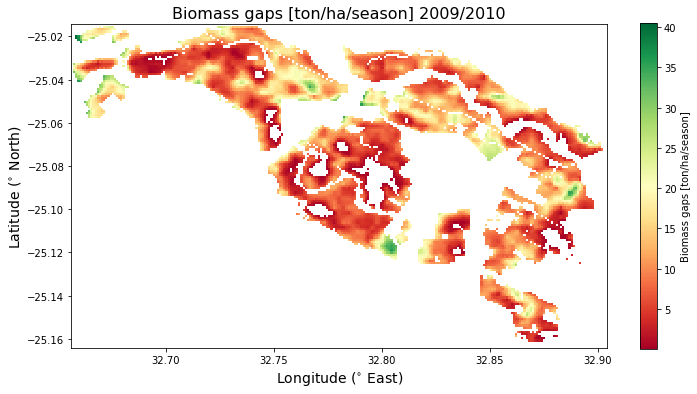

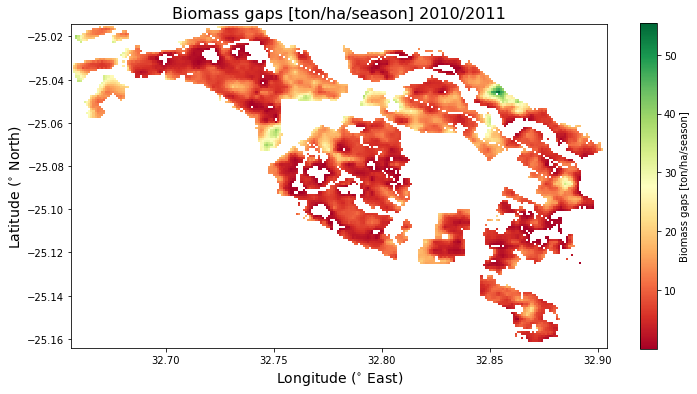

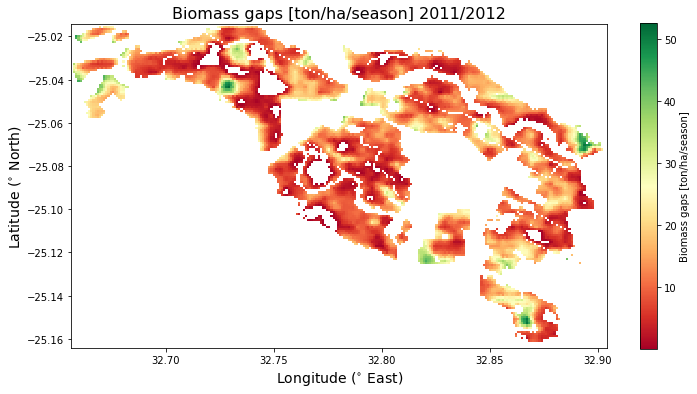

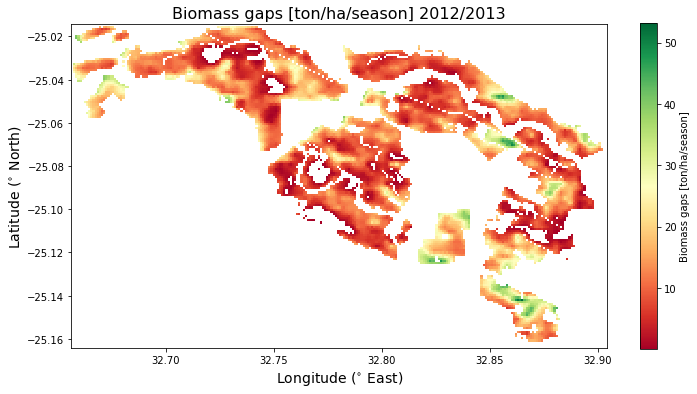

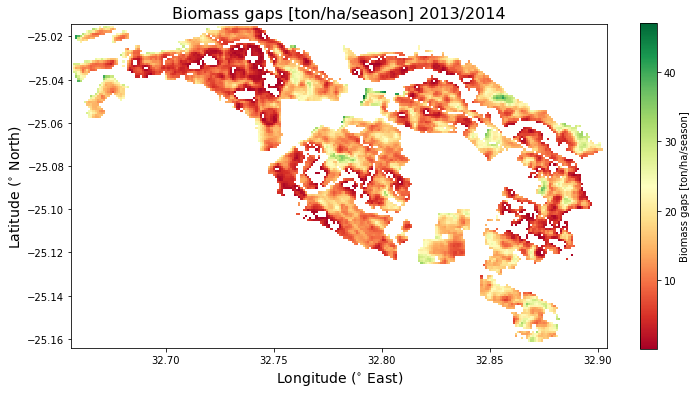

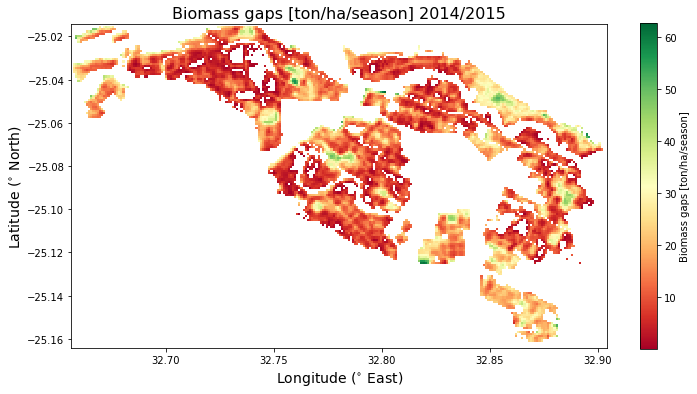

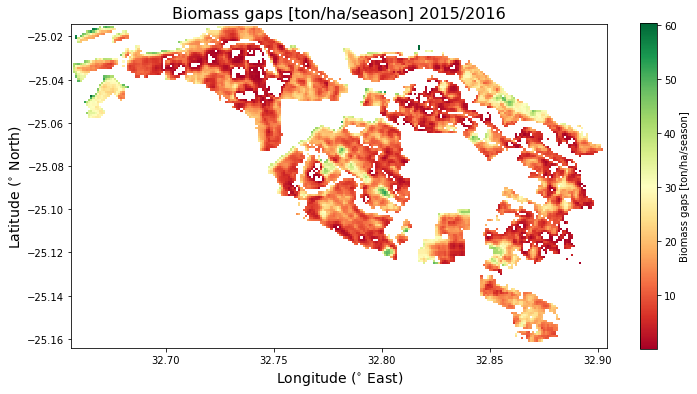

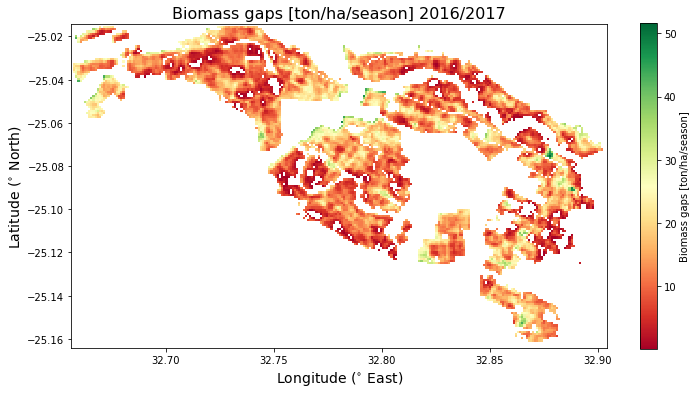

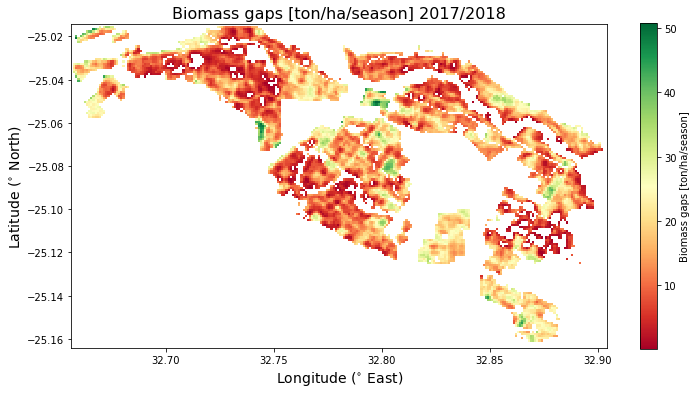

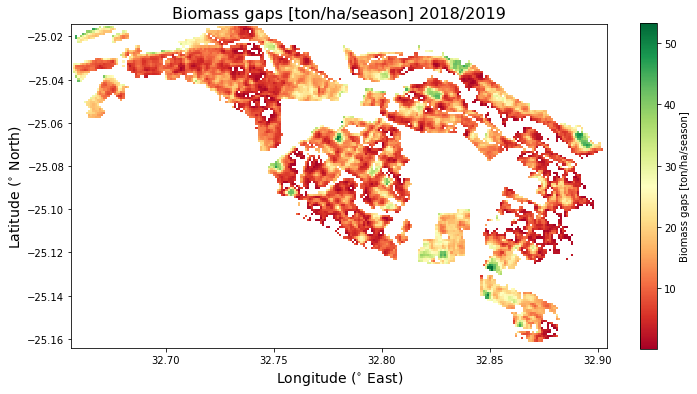

In [8]:
in_fh = input_Yieldfhs1[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

year = 2009
for in_fh in input_Yieldfhs1: 
    cropYield1 = gis.OpenAsArray(in_fh, nan_values=True) 
    
    # productivity gaps
    Yieldgap = np.where(cropYield1 < df_targets.Target_Yield[year - 2009],
                        df_targets.Target_Yield[year - 2009] - cropYield1,
                        np.nan)
    
    # save yield gap
    output_folder = output_folder1
    basename      = os.path.basename(in_fh).replace('BM','BiomassGaps')
    output_fn     = os.path.join(output_folder, basename)
    gis.CreateGeoTiff(output_fn, Yieldgap, driver, NDV, xsize, ysize, GeoT, Projection) 
    
    # Plot the raster map
    seasonal = Yieldgap
    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='RdYlGn', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label ='Biomass gaps [ton/ha/season]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=14)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=14)
    plt.title('Biomass gaps [ton/ha/season] ' + str(year) + '/' + str(year + 1), fontsize=16)
    plt.show () 
    
    year += 1

## c) biomass (crop) WP gaps

C:\Users\ach006\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


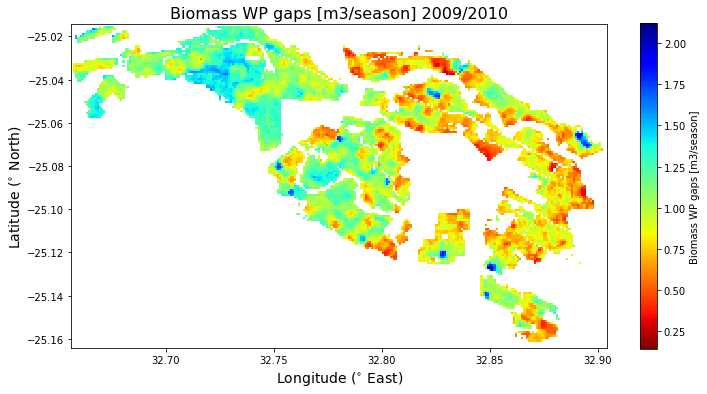

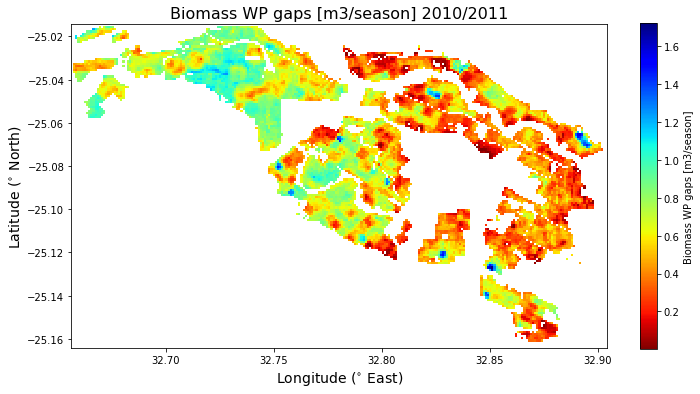

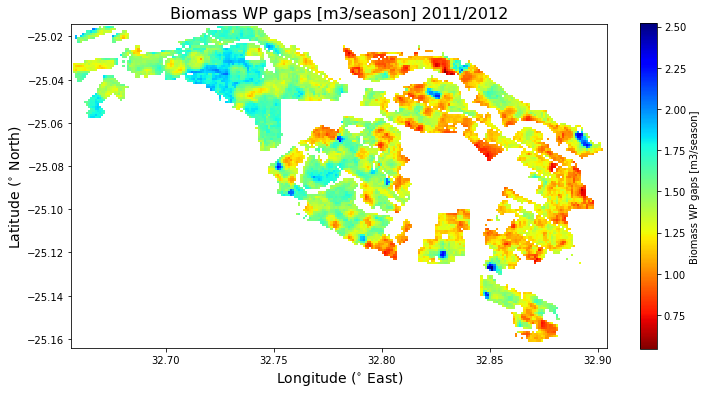

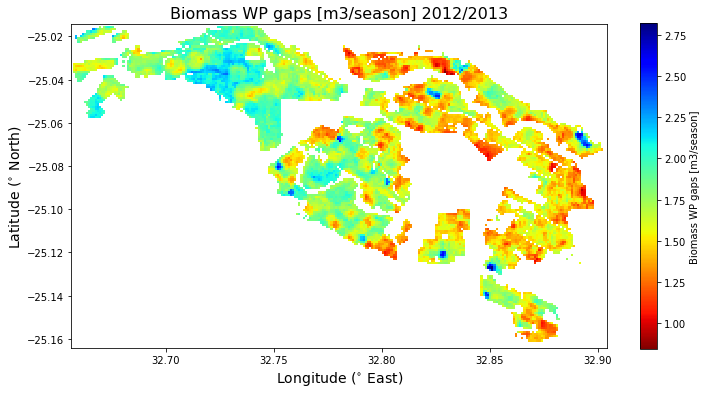

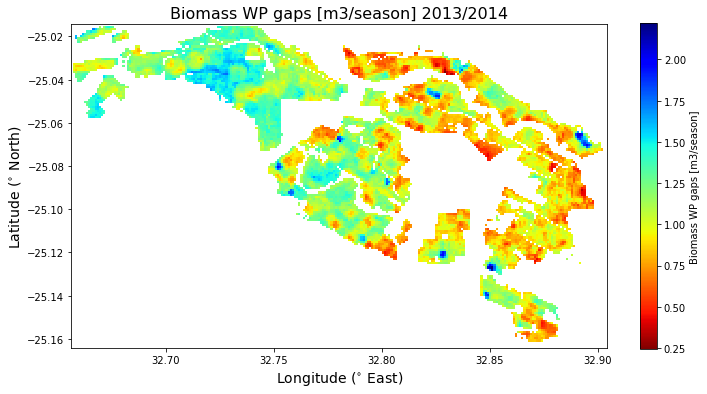

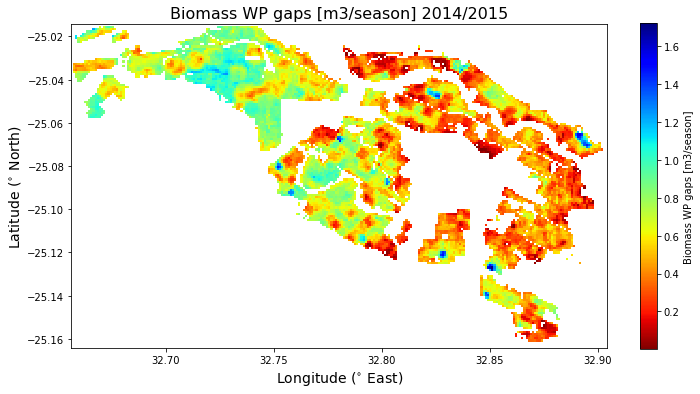

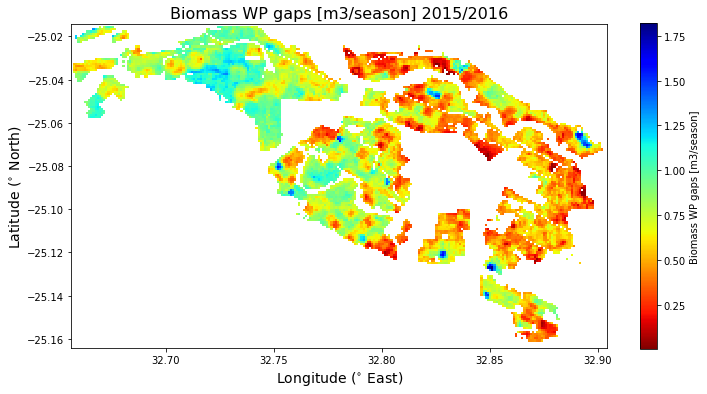

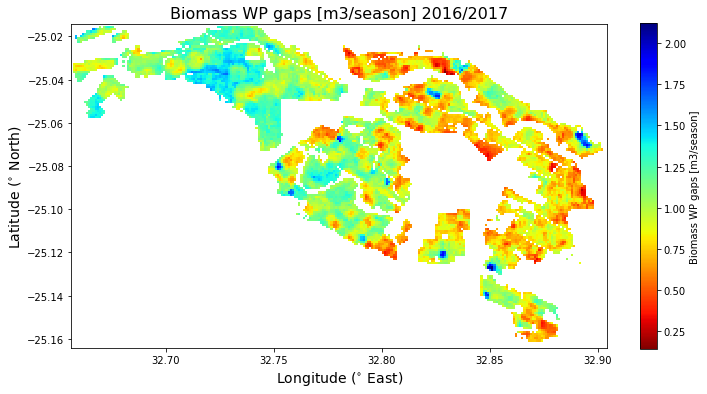

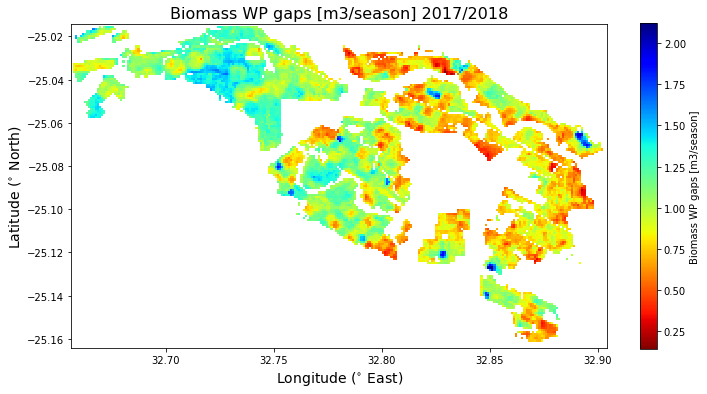

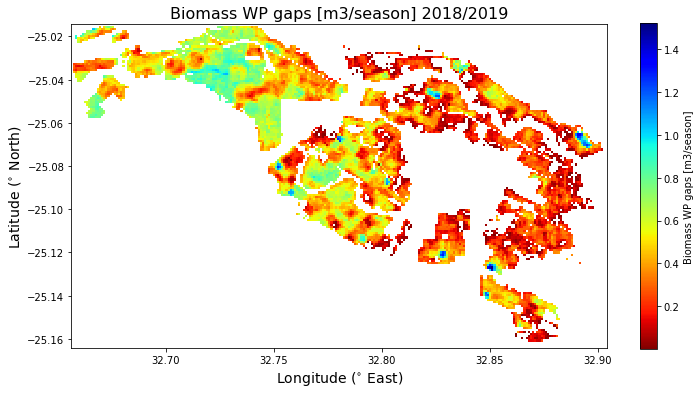

In [9]:
in_fh = input_Yieldfhs1[0]      
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

year = 2009
for in_fh in input_WPfhs1: 
    wP1 = gis.OpenAsArray(in_fhWP, nan_values=True) 
    
    # productivity gaps
    WPgap = np.where(wP1 < df_targets.Target_WP[year - 2009],
                     df_targets.Target_WP[year - 2009] - wP1,
                     np.nan)
    
    # save WP gap
    output_folder = output_folder2
    basename      = os.path.basename(in_fh).replace('WP', 'WPgaps')
    output_fn     = os.path.join(output_folder, basename)
    gis.CreateGeoTiff(output_fn, WPgap, driver, NDV, xsize, ysize, GeoT, Projection) 
    
    # Plot the raster map
    seasonal = WPgap
    
    plt.figure(figsize = (12,8))
    plt.imshow(seasonal, cmap='jet_r', vmin=np.nanmin(seasonal), vmax=np.nanmax(seasonal), extent=spatial_extent)
    plt.colorbar(shrink=0.75, label = 'Biomass WP gaps [m3/season]')
    plt.xlabel('Longitude ($^{\circ}$ East)', fontsize=14)  # add axes label
    plt.ylabel('Latitude ($^{\circ}$ North)', fontsize=14)
    plt.title('Biomass WP gaps [m3/season] ' + str(year) + '/' + str(year + 1), fontsize= 16)
    plt.show () 
    
    year += 1